# Clustering
With using clustering we want to check if the different types of fish is living in different places using the cordinates, and if this is one of the huge impacts on the other ML models we are using

In [2]:
import import_ipynb
from preprocess import df
df.head()

,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month
17,74.931,15.785,-443.0,243.0,74.926,15.894,-358.0,3214.0,51.0,0,Torsk,7022.0,12.60,56.80,12
20,67.826,12.967,-71.0,72.0,67.829,12.933,-54.0,1471.0,61.0,0,Torsk,1800.0,5.06,19.10,1
26,69.744,16.516,-1090.0,881.0,69.744,16.516,-1090.0,0.0,20.0,1,Sei,2895.0,9.00,27.49,1
32,72.866,29.105,-298.0,900.0,72.868,29.114,-293.0,371.0,32.0,0,Torsk,8371.0,10.00,46.58,1
37,59.385,0.562,-124.0,233.0,59.186,0.626,-130.0,22467.0,58.0,1,Sei,336.0,7.00,24.27,12


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Selecting features
features = ['Havdybde start', 'Varighet', 'Startposisjon bredde', 'Startposisjon lengde',
    'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 
    'Redskap FDIR (kode)', 'Rundvekt', 'Month']
X = df[features]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Note: In clustering, we typically don't split the data into training and testing sets in the same way as classification
# Here, we're just scaling the data. The clustering process will be done on the entire dataset

In [4]:
# KMeans clustering model
# Assuming the number of clusters, later checked using elbow method.
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=50, random_state=42)
kmeans.fit(X_scaled)

# Making predictions
# In clustering, we don't make predictions in the same way as in classification. Instead, we assign each data point to a cluster.
labels = kmeans.labels_

Silhouette Score: 0.3229333899678686


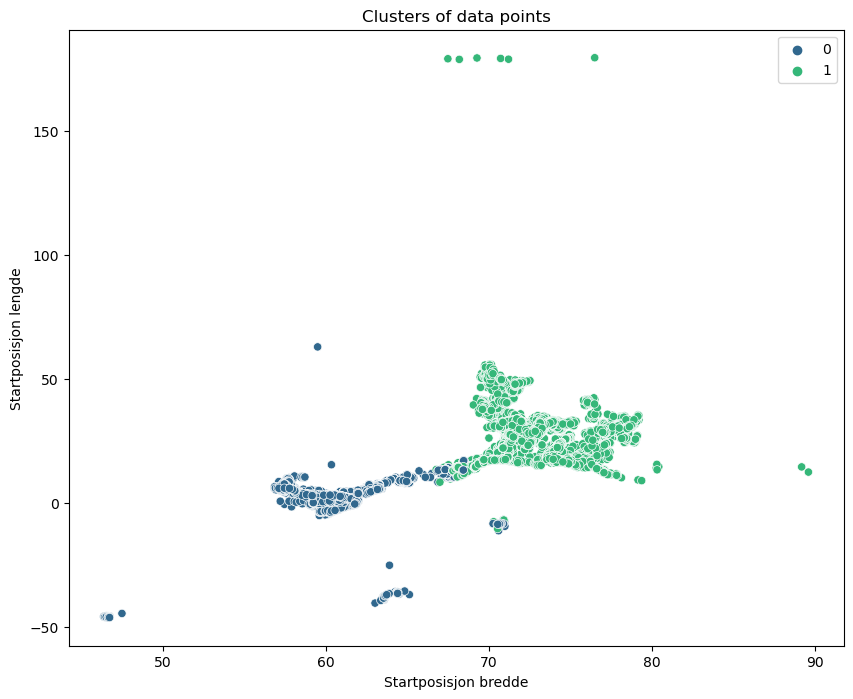

In [5]:
# Evaluating the model
# One common way to evaluate clustering models is by using the silhouette score, which measures how similar an object is to its own cluster compared to other clusters.
silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

# Distribution of your data points across the clusters:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the clusters
# With use of StartPosisjon bredde and Startposisjon lengde its easy to visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X, x='Startposisjon bredde', y='Startposisjon lengde', hue=labels, palette='viridis')
plt.title('Clusters of data points')
plt.show()

# Using Elbow method to find the optimal amount of clusters

c:\Users\47476\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

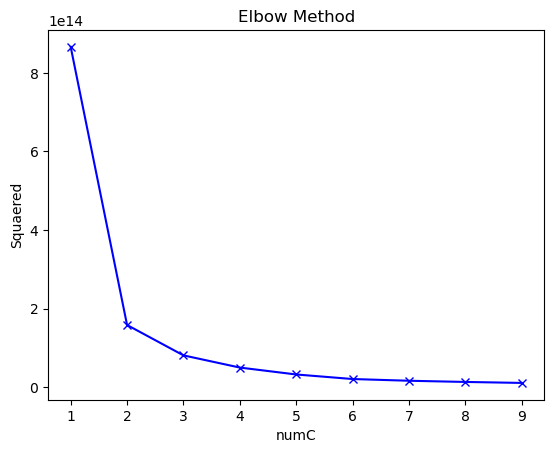

In [20]:

squared_distances = []
numC = range(1,10)
for num_clusters in numC:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    squared_distances.append(kmeans.inertia_)

plt.plot(numC, squared_distances, 'bx-')
plt.xlabel('numC') 
plt.ylabel('Squaered') 
plt.title('Elbow Method')
plt.show()

By looking at where it bends we find the optimal numbers of clusters. Which in this case is 2.

In [14]:
y_predict = kmeans.fit_predict(X_scaled)
print(y_predict)
df['cluster'] = y_predict
df.head()

[1 1 0 ... 1 1 1]


,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month,cluster
17,74.931,15.785,-443.0,243.0,74.926,15.894,-358.0,3214.0,51.0,0,Torsk,7022.0,12.60,56.80,12,1
20,67.826,12.967,-71.0,72.0,67.829,12.933,-54.0,1471.0,61.0,0,Torsk,1800.0,5.06,19.10,1,1
26,69.744,16.516,-1090.0,881.0,69.744,16.516,-1090.0,0.0,20.0,1,Sei,2895.0,9.00,27.49,1,0
32,72.866,29.105,-298.0,900.0,72.868,29.114,-293.0,371.0,32.0,0,Torsk,8371.0,10.00,46.58,1,0
37,59.385,0.562,-124.0,233.0,59.186,0.626,-130.0,22467.0,58.0,1,Sei,336.0,7.00,24.27,12,1


In [15]:
# Count rows where 'cluster' is 0 and 'ART FDIR' is 0
count_0 = df.loc[(df['cluster'] == 0) & (df['Hovedart FAO'] == 0)].shape[0]

# Count rows where 'cluster' is 1 and 'ART FDIR' is 1
count_1 = df.loc[(df['cluster'] == 1) & (df['Hovedart FAO'] == 1)].shape[0]

count_01 = df.loc[(df['cluster'] == 0) & (df['Hovedart FAO'] == 1)].shape[0]
count_10 = df.loc[(df['cluster'] == 1) & (df['Hovedart FAO'] == 0)].shape[0]

print(f"Count where cluster is 0 and ART FDIR is 0: {count_0}")
print(f"Count where cluster is 1 and ART FDIR is 1: {count_1}")
print(f"Count where cluster is 0 and ART FDIR is 1: {count_01}")
print(f"Count where cluster is 1 and ART FDIR is 0: {count_10}")


Count where cluster is 0 and ART FDIR is 0: 4570
Count where cluster is 1 and ART FDIR is 1: 16021
Count where cluster is 0 and ART FDIR is 1: 2553
Count where cluster is 1 and ART FDIR is 0: 20435


In [16]:
acc_based = (count_0 + count_1)/(count_01 + count_10 + count_0 + count_1)
print(acc_based)

0.4724982216205053


Based on this score we can see that we get the nearly alike scores like the other ml models. This makes us belive that the clustering has made up catagories wich is the art-fdir. Where we see that the position of the boat has a big impact on what fish we get.

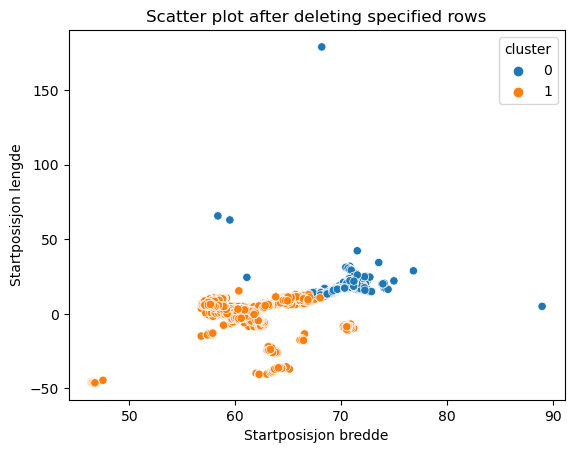

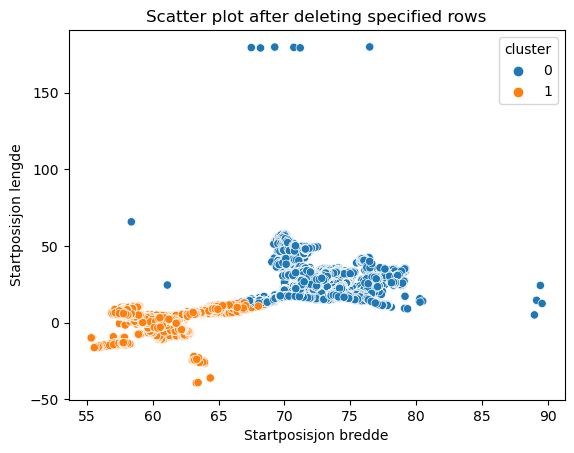

In [49]:
df_0 = df.loc[~((df['cluster'] == 1) & (df['Art - FDIR'] == 1)) & ~((df['cluster'] == 0) & (df['Art - FDIR'] == 0))]
sns.scatterplot(data=df_0, x='Startposisjon bredde', y='Startposisjon lengde', hue='cluster')
plt.title('Scatter plot after deleting specified rows')
plt.show()
#Viser de som er like av art FDIR 0 og 1
df_1 = df.loc[~((df['cluster'] == 0) & (df['Art - FDIR'] == 1)) & ~((df['cluster'] == 1) & (df['Art - FDIR'] == 0))]
sns.scatterplot(data=df_1, x='Startposisjon bredde', y='Startposisjon lengde', hue='cluster')
plt.title('Scatter plot after deleting specified rows')
plt.show()

When we look at the 2 different showing of which one the clusterpredict == art fdir and where it !=. We can see some deviation on some of the points far away from, where its should be clearly difference in where fish get caught, but since the same boat in the same place we will get some wrong for the clustering, where the boat at same place catch both the fish.